In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors 
from sklearn.decomposition import PCA

from evaluations.sample_eval_data import Phrase, PhrasePair, Embedding

sns.set()
# plt.style.use('seaborn')

In [4]:
model = Embedding(
    embed_path='../../data/pretrained_word2vec/for_real.txt',
    party_freq_path='../../data/processed/plain_text/for_real/vocab_partisan_frequency.tsv',
    min_freq=100)

Dem_ids = []
GOP_ids = []
very_neutral_ids = []
kinda_neutral_ids = []
partisan_lower_bound = 0.8
neutral_bound = 0.1
neutral_upper_bound = 0.5 + neutral_bound
neutral_lower_bound = 0.5 - neutral_bound
for phrase_id, phrase in model.id_to_phrase.items():
    if phrase.D_ratio > partisan_lower_bound:
        Dem_ids.append(phrase_id)
    elif phrase.R_ratio > partisan_lower_bound:
        GOP_ids.append(phrase_id)
    elif neutral_lower_bound < phrase.R_ratio < neutral_upper_bound:
        very_neutral_ids.append(phrase_id)
    else:
        kinda_neutral_ids.append(phrase_id)

print(f'{len(GOP_ids)} capitalists\n'
      f'{len(Dem_ids)} socialists\n'
      f'{len(very_neutral_ids)} swing voters\n'
      f'{len(kinda_neutral_ids)} neoliberal shills')
Dem_ids, GOP_ids, very_neutral_ids, kinda_neutral_ids = map(
    np.array, (Dem_ids, GOP_ids, very_neutral_ids, kinda_neutral_ids))

Loading pretrained embeddings from ../../data/pretrained_word2vec/for_real.txt
vocab_size = 111,387, num_dimensions = 300
with min_frequency = 100, frequency file vocab size = 48577
808 capitalists
1256 socialists
33116 swing voters
13397 neoliberal shills


In [310]:
def cluster_neighborhood(
        query: str,
        model: Embedding,
        top_k: int
        ) -> None:
    all_vocab_ids = np.array(list(model.id_to_phrase.keys()))
    query_id = model.word_to_id[query]
    stuff = model.nearest_partisan_neighbors(
        [query_id], all_vocab_ids, top_k=top_k)
    neighborhood = [nid for nid, _ in stuff[query_id]]
    neighborhood.append(query_id)
    
    indices = []
    names = []
    biases = {}
    for neighbor_id in neighborhood:
        indices.append(neighbor_id)
        neighbor = model.id_to_phrase[neighbor_id]
        names.append(neighbor.words)
#         print(neighbor.words)
        biases[neighbor.words] = neighbor.D_ratio
    
    vecs = model.embedding[indices]
 
    pca = PCA(n_components=2)
    to_plot = pca.fit_transform(np.array(vecs))  
    #print(to_plot)
    #fig = plt.figure()
    #ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
#     fig.set_size_inches((7,7))
    #print(fig)
    

    for y, x, v in zip(names, to_plot, vecs):
        #print(y, x, v[:10])
        color = 'k'
        alpha = 0
        if y in biases:
            if biases[y] < 0.4:
                color = 'maroon'
                alpha = (0.5 - biases[y]) / 0.5
            elif biases[y] > 0.6:
                color = 'midnightblue'  
                alpha = (biases[y] - 0.5) / 0.5
            else:
                color = 'grey'
                alpha = 0.4
        else:
            print("missing", y)
        plt.scatter(x[0], x[1], color='white', s=20)
        plt.text(x[0], x[1], y.replace('_', ' '),
                 ha="center", va="center", # fontsize="large",
                 color=color)#, alpha=(1-alpha)-0.2)

#     plt.gca().axes.get_yaxis().set_visible(False)
#     plt.gca().axes.get_xaxis().set_visible(False)
    #ax.plot(x, y)
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.spines['left'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
#     [s.set_visible(False) for s in ax.spines.values()]
#     [t.set_visible(False) for t in ax.get_xticklines()]
#     [t.set_visible(False) for t in ax.get_yticklines()]
#     ax.set_xticks([])
#     ax.set_yticks([])

#     ax.set_xticklabels([])
#     ax.set_yticklabels([])
#     plt.savefig("motivational_figure.pdf", dpi=500)
    plt.show()

    
def cluster_two(
        query1: str,
        query2: str,
        model: Embedding,
        top_k: int
        ) -> None:
    all_vocab_ids = np.array(list(model.id_to_phrase.keys()))
    query_id1 = model.word_to_id[query1]
    stuff1 = model.nearest_partisan_neighbors(
        [query_id1], all_vocab_ids, top_k=top_k)
    
    query_id2 = model.word_to_id[query2]
    stuff2 = model.nearest_partisan_neighbors(
        [query_id2], all_vocab_ids, top_k=top_k)
    
    neighborhood = [nid for nid, _ in stuff1[query_id1]]
    neighborhood += [nid for nid, _ in stuff2[query_id2]]
    neighborhood.append(query_id1)
    neighborhood.append(query_id2)
    
    indices = []
    names = []
    biases = {}
    for neighbor_id in neighborhood:
        indices.append(neighbor_id)
        neighbor = model.id_to_phrase[neighbor_id]
        names.append(neighbor.words)
#         print(neighbor.words)
        biases[neighbor.words] = neighbor.D_ratio
    
    vecs = model.embedding[indices]
 
    pca = PCA(n_components=2)
    to_plot = pca.fit_transform(np.array(vecs))  
    fig, ax = plt.subplots()

    for y, x, v in zip(names, to_plot, vecs):
#         color = 'k'
#         alpha = 0
        if y in biases:
            if biases[y] < 0.5:
                color = 'maroon'
                alpha = (0.5 - biases[y]) / 0.5
            elif biases[y] > 0.5:
                color = 'midnightblue'  
                alpha = (biases[y] - 0.5) / 0.5
            else:
                color = 'grey'
                alpha = 0.4
        else:
            print("missing", y)
        plt.scatter(x[0], x[1], color='white', s=20)
        plt.text(x[0], x[1], y.replace('_', ' '),
                 ha="center", va="center", # fontsize="large",
                 color=color)#, alpha=(1-alpha)-0.2)

    plt.savefig("motivational_figure.pdf", dpi=500)
    plt.show()


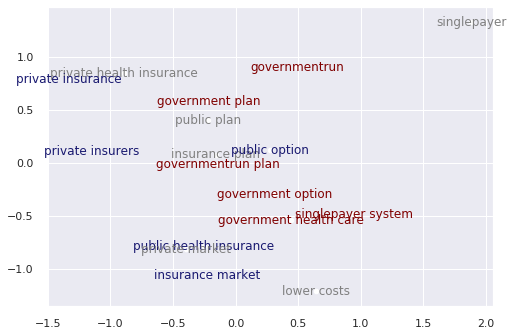

In [244]:
cluster_neighborhood('public_option', model, top_k=16)

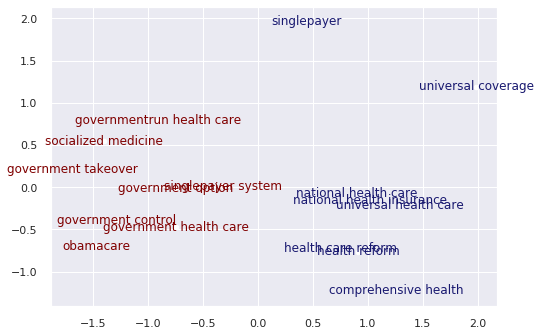

In [311]:
q1 = 'universal_health_care'
q2 = 'socialized_medicine'
cluster_two(q1, q2, model, top_k=7)

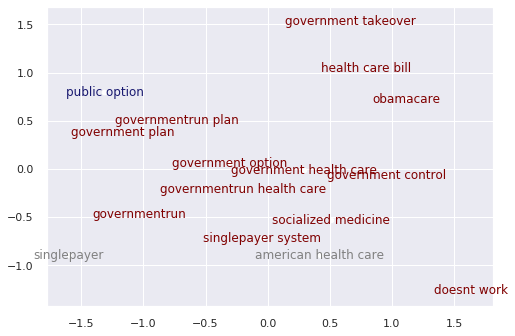

In [223]:
cluster_neighborhood('socialized_medicine', model, top_k=15)

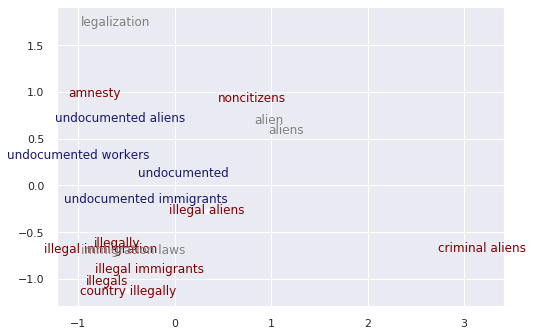

In [239]:
cluster_neighborhood('illegal_aliens', model, top_k=16)